<a href="https://colab.research.google.com/github/divyasri27k/Image-forgery-detection/blob/main/IMAGE_FORGERY_DETECTION_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

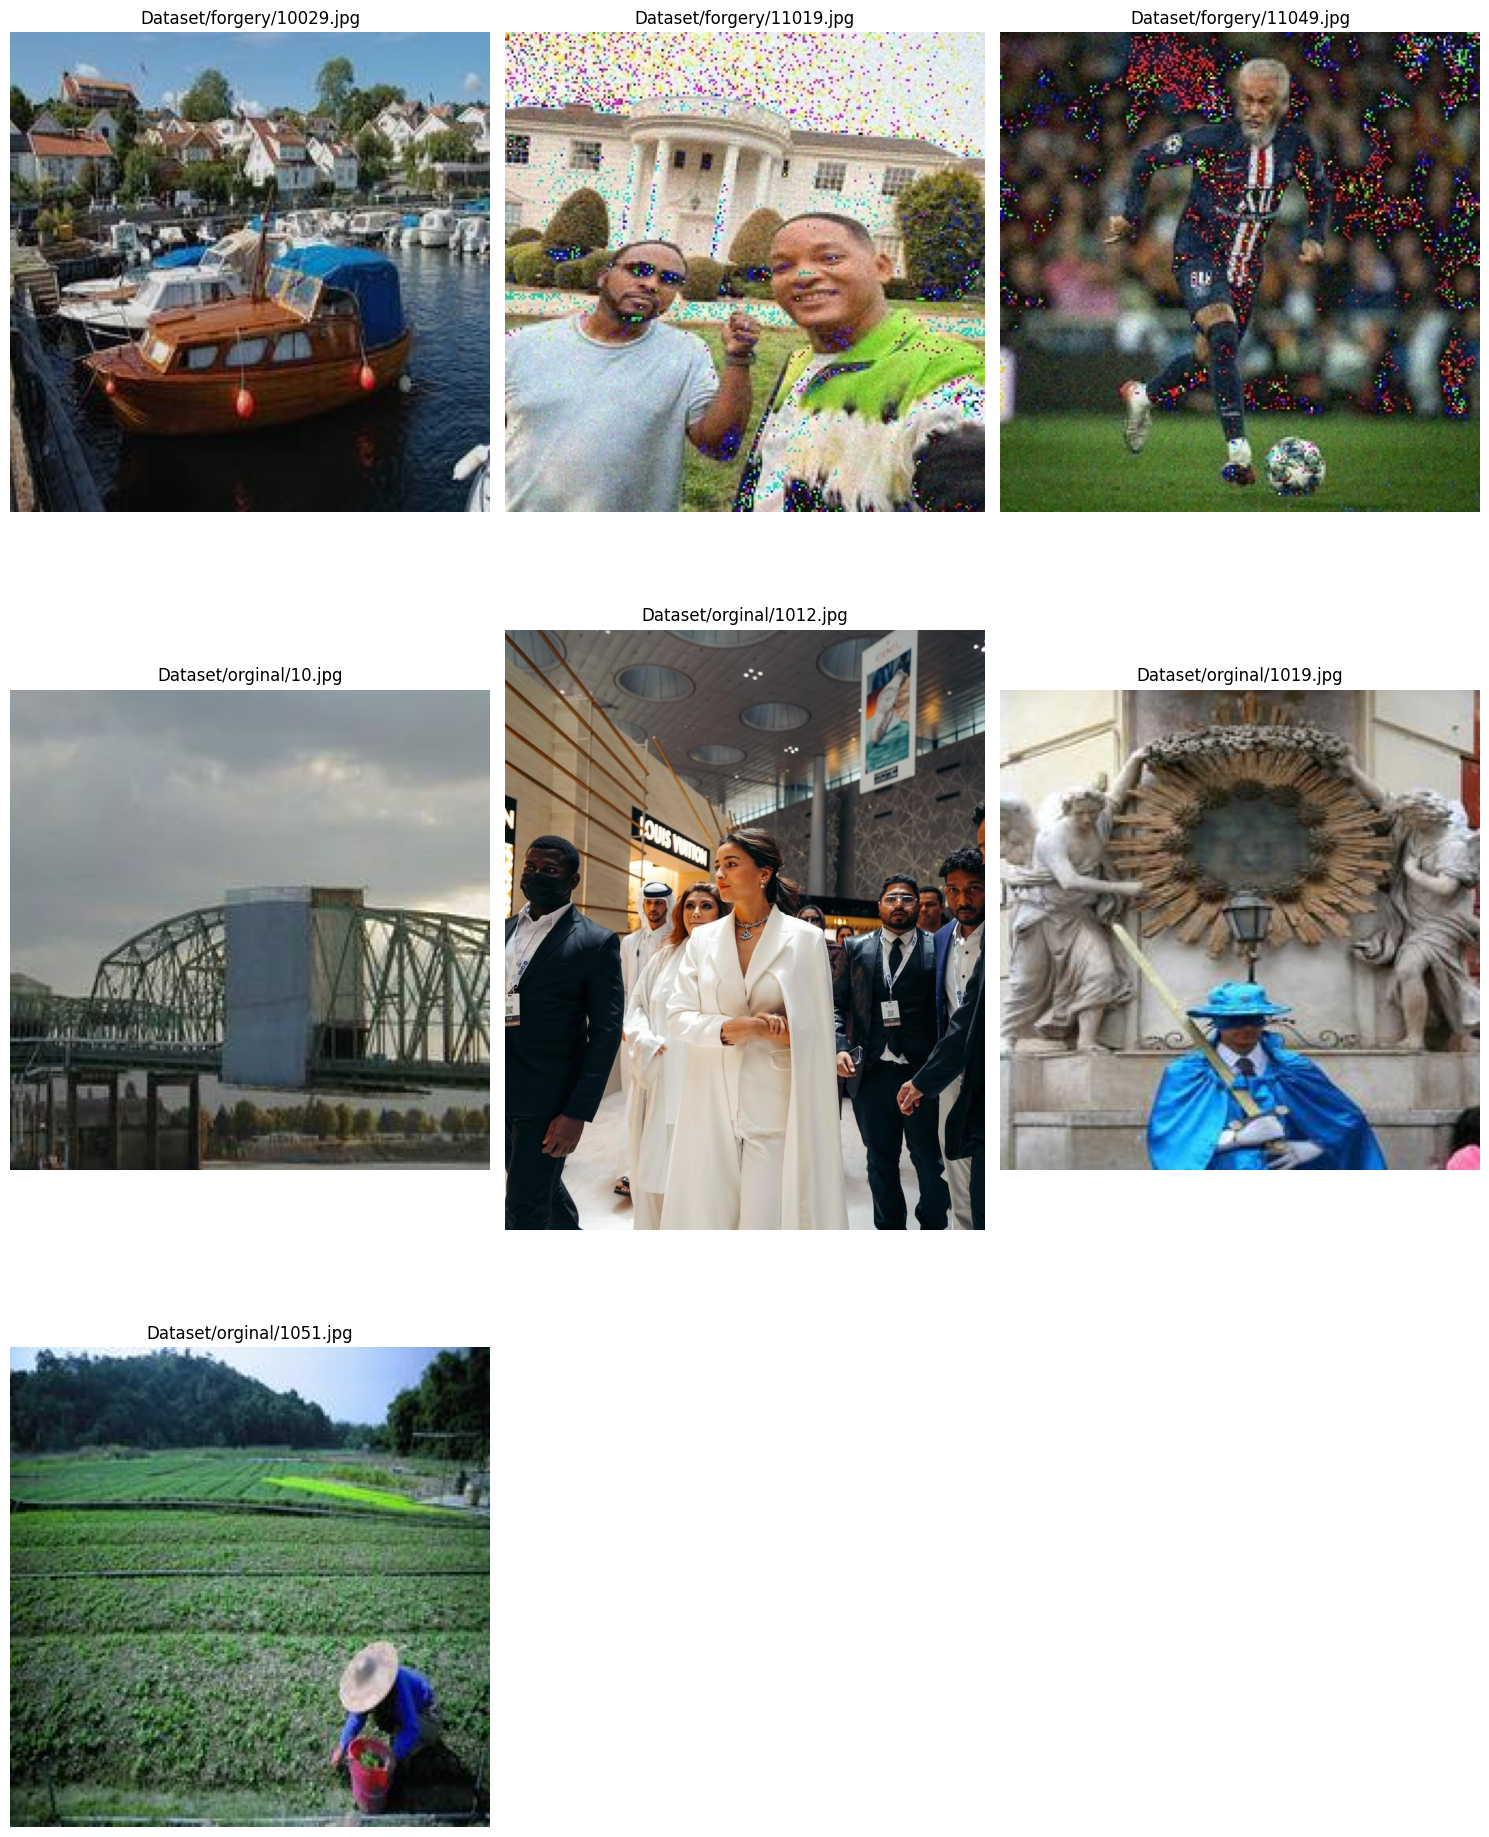

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.models import load_model
import time
import zipfile # import zipfile module to work with zip files

# Function to preprocess an image
def preprocess_image(image_path):
    img = ELA(image_path)
    img = img.resize((224, 224))  # Resize the image to match the input size of your model
    img = np.array(img) # Normalize pixel values to [0, 1]
    return img

# Path to the zip file containing images
image_zip_path = '/content/Dataset.zip'


num_cols = 3  # Number of columns in the grid

start_time = time.time()

# Open the zip file once outside the loop
with zipfile.ZipFile(image_zip_path, 'r') as zip_ref:
    # Get a list of all files in the zip file
    image_files = [f for f in zip_ref.namelist() if f.endswith(('.jpg'))]
    num_images = len(image_files)
    num_rows = -(-num_images // num_cols)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
    axes = axes.flatten()  # Flatten the axes array for easier iteration

    for i, image_file in enumerate(image_files):
        # Preprocess the image
        # Extract the image from the zip file to a temporary file
        with zip_ref.open(image_file) as img_file:  # Now inside the outer 'with' block
            image = Image.open(img_file).convert("RGB")

            # Display the image
            axes[i].imshow(image)
            axes[i].axis('off')  # Turn off axis labels
            axes[i].set_title(image_file)  # Set title as filename

    # Remove any empty subplots if num_images is not a multiple of num_cols
    for j in range(num_images, num_rows * num_cols):
        fig.delaxes(axes[j])

    plt.tight_layout()  # Adjust subplot parameters for a tight layout
    plt.show()  # Display the figure


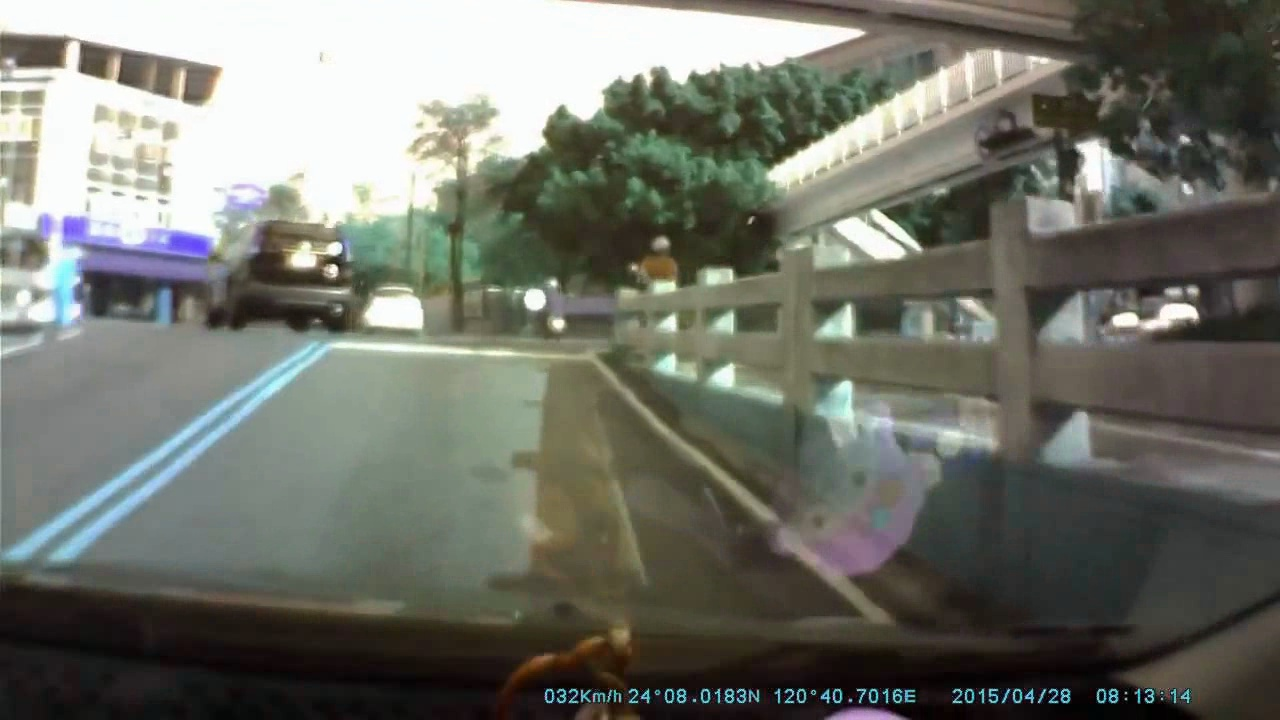
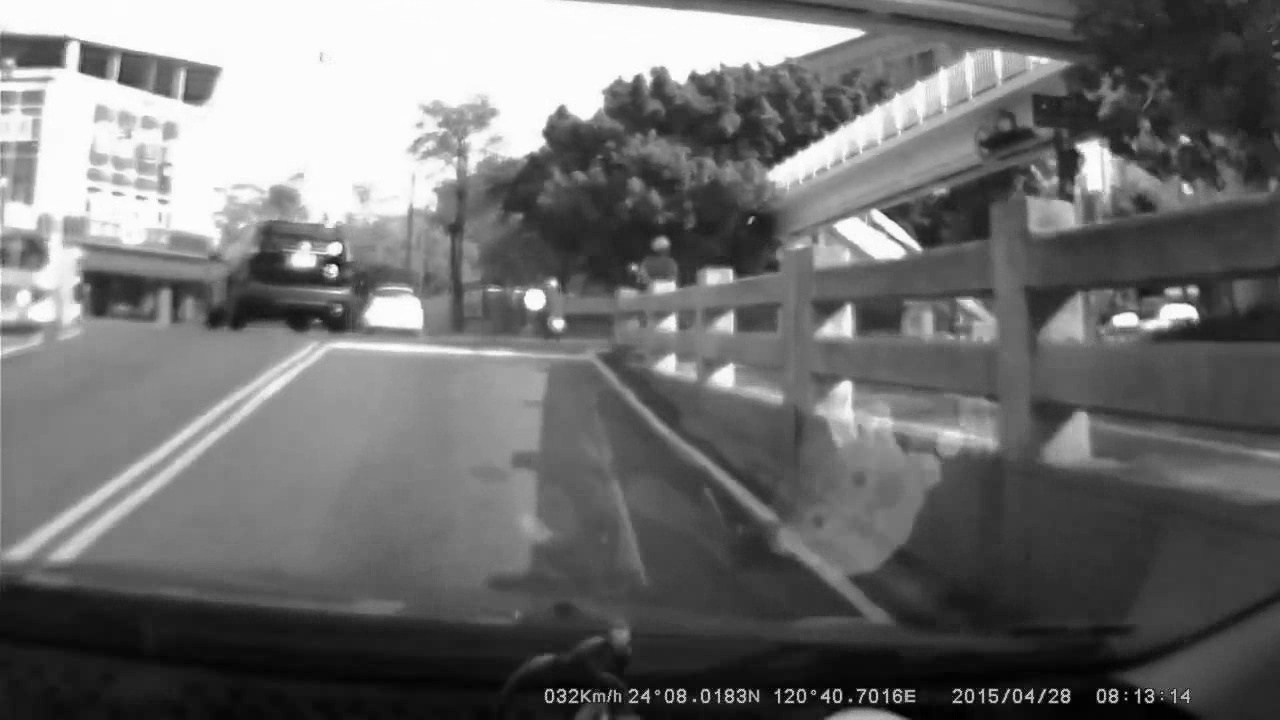

In [ ]:
!pip install imageio-ffmpeg
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time
import zipfile
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import clear_output, display, HTML
import imageio  # Import imageio for video processing
import base64 # import base64 to encode bytes to string

# Function to preprocess an image
def preprocess_image(image_path):
    img = ELA(image_path)
    img = img.resize((224, 224))
    img = np.array(img)
    return img

# Function to calculate ELA difference (placeholder)
def ELA(image_path_or_frame):
    """
    Calculates the Error Level Analysis (ELA) difference for an image or video frame.

    Args:
        image_path_or_frame: Path to the image file or a NumPy array representing a video frame.

    Returns:
        A NumPy array representing the ELA difference image.
    """
    # If it's a path, open the image using PIL
    if isinstance(image_path_or_frame, str):
        image = Image.open(image_path_or_frame)
    # If it's a NumPy array (video frame), convert it to PIL Image
    else:
        image = Image.fromarray(image_path_or_frame)

    # Placeholder for ELA calculation - replace with your actual logic
    # Here, we just return the original image (no ELA difference)
    return np.array(image)

# Path to the zip file containing images and videos
image_zip_path = '/content/Dataset.zip'

num_cols = 3  # Number of columns in the grid
start_time = time.time()

# Open the zip file once outside the loop
with zipfile.ZipFile(image_zip_path, 'r') as zip_ref:
    # Get a list of all files in the zip file
    all_files = zip_ref.namelist()

    # Separate image, original video, and forged video files
    image_files = [f for f in all_files if f.endswith(('.jpg', '.png'))]
    original_video_files = [f for f in all_files if f.endswith(('.mp4', '.avi')) and 'orginal' in f]
    forged_video_files = [f for f in all_files if f.endswith(('.mp4', '.avi')) and 'forgery' in f]

    # Process and display original and forged videos
    for video_files, is_forgery_label in [(original_video_files, "Original"), (forged_video_files, "Forged")]:
        for video_file in video_files:
            with zip_ref.open(video_file) as vid_file:
                temp_video_path = "temp_video.mp4"
                with open(temp_video_path, 'wb') as temp_file:
                    temp_file.write(vid_file.read())

                cap = cv2.VideoCapture(temp_video_path)

                while cap.isOpened():
                    ret, frame = cap.read()
                    if ret:
                        # Calculate ELA difference for the frame
                        ela_frame = ELA(frame)

                        # Convert the frame to RGB for display in Colab
                        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                        _, frame_encoded = cv2.imencode('.jpg', frame_rgb)
                        frame_encoded_base64 = base64.b64encode(frame_encoded).decode('utf-8')

                        # Convert ELA frame to grayscale for display
                        ela_frame_gray = cv2.cvtColor(ela_frame, cv2.COLOR_BGR2GRAY)
                        _, ela_encoded = cv2.imencode('.jpg', ela_frame_gray)
                        ela_encoded_base64 = base64.b64encode(ela_encoded).decode('utf-8')

                        # Display both original frame and ELA difference
                        display(HTML(f'''
                            <div style="display: flex;">
                                <img src="data:image/jpeg;base64,{frame_encoded_base64}" />
                                <img src="data:image/jpeg;base64,{ela_encoded_base64}" />
                            </div>
                            <p>{is_forgery_label} Video</p>
                        '''))

                        time.sleep(0.04)  # Adjust as needed for frame rate
                        clear_output(wait=True)
                    else:
                        break

                cap.release()


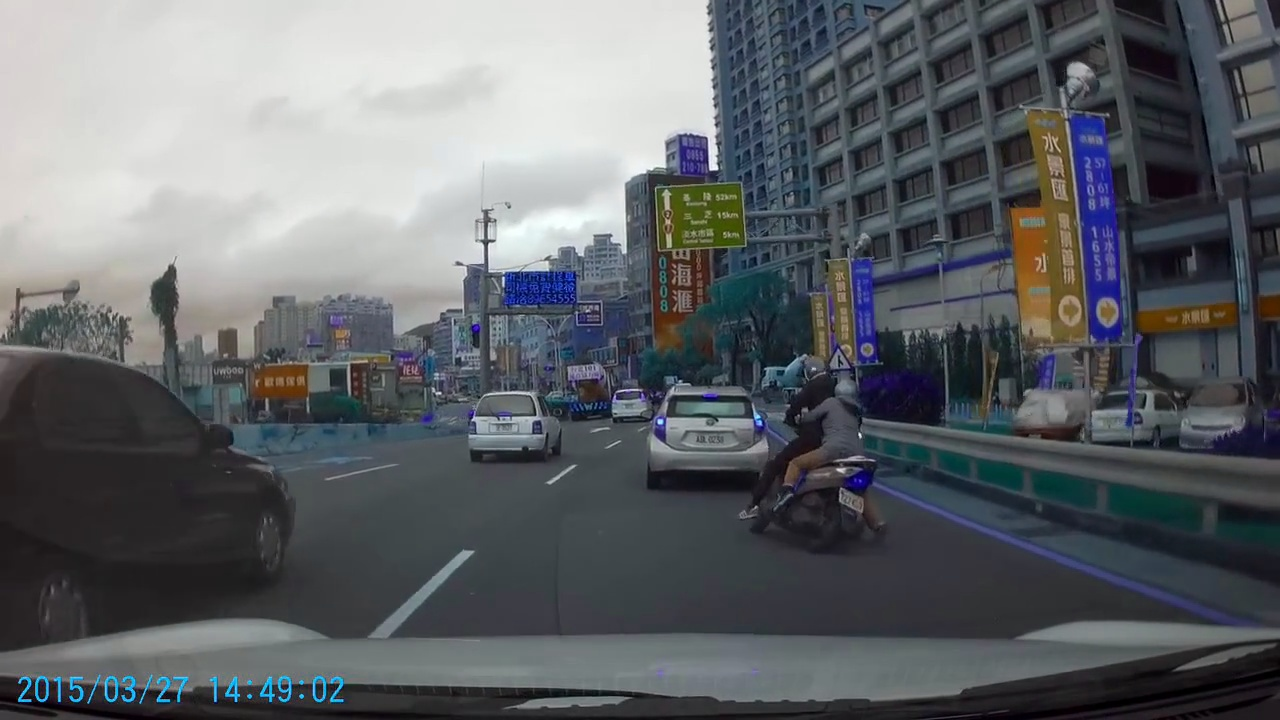

Original video


In [ ]:
!pip install imageio-ffmpeg
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time
import zipfile
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import clear_output, display, HTML
import imageio  # Import imageio for video processing
import base64


# Assume this is your ELA function. Replace with your actual implementation
def ELA(image):
    # This is a placeholder. Replace with your actual ELA function
    # You can use imageio or OpenCV for reading frames if needed
    # For example, using imageio:
    #  image_data = imageio.imread(image_path)
    #  # Process image_data to get ELA difference
    #  # ...
    #  # Return the ELA image (e.g., a NumPy array)
    #  return ela_image
    # Or using OpenCV, if image is already a NumPy array:
    #  # Process image (NumPy array) to get ELA difference
    #  # ...
    #  # Return the ELA image
    #  return ela_image
    return image  # Placeholder: Return the original image for now



# Function to preprocess an image (remains the same)
def preprocess_image(image_path):
    img = ELA(image_path)
    img = img.resize((224, 224))
    img = np.array(img)
    return img

# Path to the zip file containing images and videos
image_zip_path = '/content/Dataset.zip'

num_cols = 3  # Number of columns in the grid
start_time = time.time()

# Open the zip file once outside the loop
with zipfile.ZipFile(image_zip_path, 'r') as zip_ref:
    # Get a list of all files in the zip file
    all_files = zip_ref.namelist()

    # Separate image and video files
    image_files = [f for f in all_files if f.endswith(('.jpg', '.png'))]  # Add '.png' if needed
    video_files = [f for f in all_files if f.endswith(('.mp4', '.avi'))]  # Add other video extensions

    # Display images (similar to before)
    num_images = len(image_files)
    num_rows_images = -(-num_images // num_cols)

    fig_images, axes_images = plt.subplots(num_rows_images, num_cols, figsize=(15, 20))
    axes_images = axes_images.flatten()

    for i, image_file in enumerate(image_files):
        with zip_ref.open(image_file) as img_file:
            image = Image.open(img_file).convert("RGB")
            axes_images[i].imshow(image)
            axes_images[i].axis('off')
            axes_images[i].set_title(image_file)

    # Remove empty image subplots
    for j in range(num_images, num_rows_images * num_cols):
        fig_images.delaxes(axes_images[j])

    plt.tight_layout()
    plt.show()

    # Display videos (using OpenCV) - Iterate through all video files
    for video_file in video_files:
        with zip_ref.open(video_file) as vid_file:
            # Save the video to a temporary file
            temp_video_path = "temp_video.mp4"  # Choose an appropriate extension
            with open(temp_video_path, 'wb') as temp_file:
                temp_file.write(vid_file.read())

            # Open the video using OpenCV
            cap = cv2.VideoCapture(temp_video_path)

            while cap.isOpened():
                ret, frame = cap.read()
                if ret:
                    # Apply ELA to the frame
                    ela_frame = ELA(frame)

                    # Determine if forgery or original (replace with your logic)
                    is_forgery = False  # Placeholder, replace with your detection logic

                    # Display the frame and ELA difference
                    # Convert the frame to RGB for display in Colab
                    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    _, frame_encoded = cv2.imencode('.jpg', frame_rgb)  # Encode frame as JPEG
                    # Use base64 to encode the image data
                    frame_encoded_base64 = base64.b64encode(frame_encoded).decode() # Decode to string
                    display(HTML(f'<img src="data:image/jpeg;base64,{frame_encoded_base64}" />'))

                    # Display forgery/original status
                    if is_forgery:
                        print("Forged video")
                    else:
                        print("Original video")

                    time.sleep(0.04)  # Adjust as needed for frame rate
                    clear_output(wait=True) # Clear output after displaying frame and status
                else:
                    break

            cap.release()